In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import io
import requests


import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
#import all the necessary liabriries requried if needed with insert more

In [2]:
df = pd.read_csv('weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
df.shape
#8425 rows and 23 columns

(8425, 23)

In [4]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [5]:
#RainTomorrow is the label while the other columns are potential features.
#the amount of missing values is not too significant for any features to be discarded at this stage.
#I aim to retain all features and find appropriate ways to impute missing values at a later stage.
#Date column is currently stored as string. We will have to convert it into datetime format for subsequent analysis

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,8350.0,13.193305,5.403596,-2.0,9.20,13.3,17.4,28.5
MaxTemp,8365.0,23.859976,6.136408,8.2,19.30,23.3,28.0,45.5
Rainfall,8185.0,2.805913,10.459379,0.0,0.00,0.0,1.0,371.0
Evaporation,4913.0,5.389395,5.044484,0.0,2.60,4.6,7.0,145.0
Sunshine,4431.0,7.632205,3.896235,0.0,4.75,8.7,10.7,13.9
WindGustSpeed,7434.0,40.174469,14.665721,7.0,30.00,39.0,50.0,107.0
WindSpeed9am,8349.0,13.847646,10.174579,0.0,6.00,13.0,20.0,63.0
WindSpeed3pm,8318.0,18.533662,9.766986,0.0,11.00,19.0,24.0,83.0
Humidity9am,8366.0,67.822496,16.833283,10.0,56.00,68.0,80.0,100.0
Humidity3pm,8323.0,51.249790,18.423774,6.0,39.00,51.0,63.0,99.0


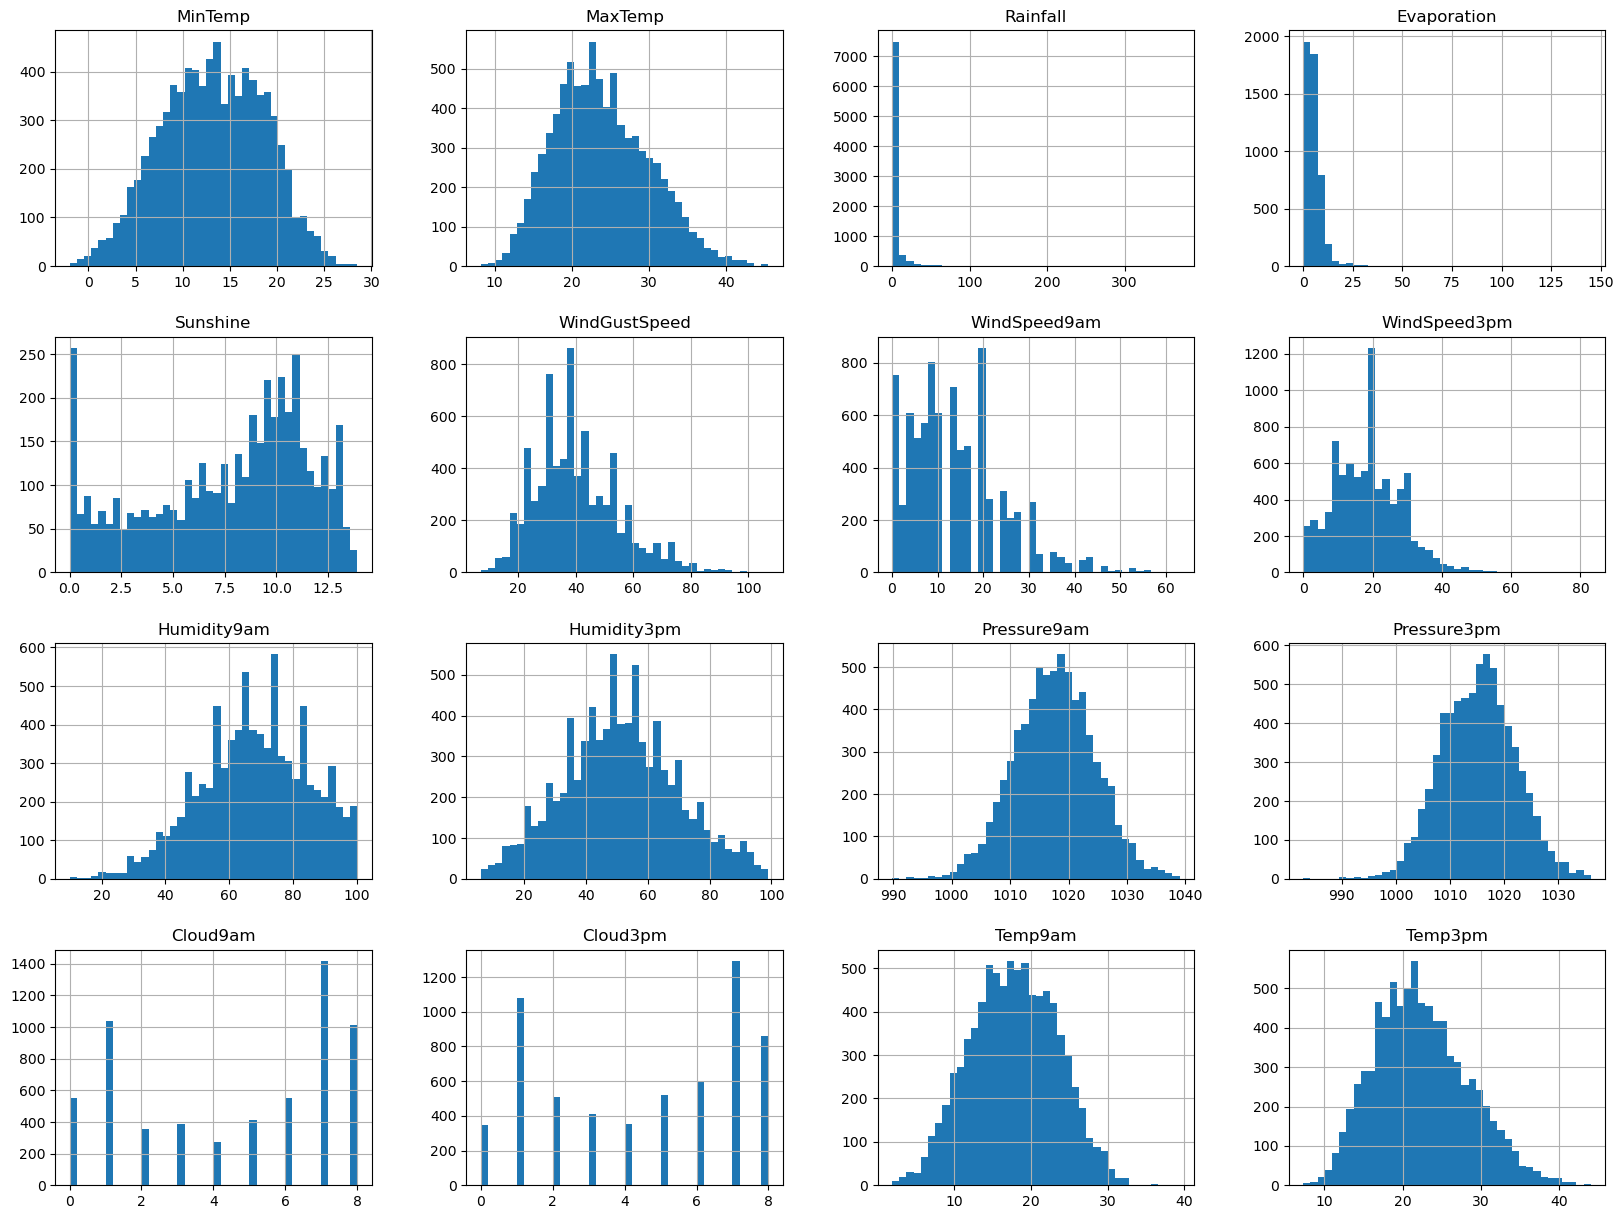

In [7]:
df.hist(bins=40,figsize = (20,15))
plt.show()

In [8]:
#Cloud9am and Cloud3pm represents cloud cover from 0 to 9.
#these is skewed data  (e.g. Rainfall, Evaporation, WindSpeed9am, WindSpeed3pm and so on).

In [9]:
df.duplicated().sum()
# duplicated value is present in  dataset

1663

In [10]:
df = df.drop_duplicates()
#duplicates value removing method

In [11]:
df.nunique()
#unique value in dataset

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

In [12]:
df.info()
#The Date column needs converted to a datetime datatype

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6762 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           6762 non-null   object 
 1   Location       6762 non-null   object 
 2   MinTemp        6692 non-null   float64
 3   MaxTemp        6705 non-null   float64
 4   Rainfall       6624 non-null   float64
 5   Evaporation    3841 non-null   float64
 6   Sunshine       3526 non-null   float64
 7   WindGustDir    5820 non-null   object 
 8   WindGustSpeed  5820 non-null   float64
 9   WindDir9am     5968 non-null   object 
 10  WindDir3pm     6468 non-null   object 
 11  WindSpeed9am   6699 non-null   float64
 12  WindSpeed3pm   6662 non-null   float64
 13  Humidity9am    6708 non-null   float64
 14  Humidity3pm    6666 non-null   float64
 15  Pressure9am    5454 non-null   float64
 16  Pressure3pm    5451 non-null   float64
 17  Cloud9am       4896 non-null   float64
 18  Cloud3pm

In [13]:
df.isin(['','NA','-']).sum().any()
# no NA white space value 

False

In [14]:
# changing the datatype of date column 
df["Date"] = pd.to_datetime(df["Date"])


# Converting Date datatypes and spliting date into date, month and year.
df['Day']=df['Date'].apply(lambda x:x.day)
df['Month']=df['Date'].apply(lambda x:x.month)
df['Year']=df['Date'].apply(lambda x:x.year)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,1,12,2008
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2,12,2008
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,3,12,2008
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,4,12,2008
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,5,12,2008


In [15]:
# Check correlation between Year and RainTomorrow with contingency table
#proportions between Yes and No for RainTomorrow did vary across different years
year_rain_cont_pct = pd.crosstab(df['Year'], df['RainTomorrow'], normalize = 'index')
year_rain_cont_pct


RainTomorrow,No,Yes
Year,,
2008,0.745763,0.254237
2009,0.748680,0.251320
2010,0.731092,0.268908
2011,0.760000,0.240000
2012,0.804373,0.195627
2013,0.799263,0.200737
2014,0.793651,0.206349
2015,0.713781,0.286219
2016,0.770149,0.229851


In [16]:
season_rain = pd.crosstab(df['Month'],df['RainTomorrow'],normalize='index')
season_rain
#month is corelated with raintomorrow

RainTomorrow,No,Yes
Month,,
1,0.827402,0.172598
2,0.734475,0.265525
3,0.756757,0.243243
4,0.721868,0.278132
5,0.778295,0.221705
6,0.722474,0.277526
7,0.772652,0.227348
8,0.754296,0.245704
9,0.765504,0.234496


In [17]:
location = pd.crosstab(df['Location'],df['RainTomorrow'],normalize='index')
location
# Check correlation between Location and RainTomorrow with contingency table


RainTomorrow,No,Yes
Location,,
Adelaide,0.776119,0.223881
Albury,0.778396,0.221604
Brisbane,0.764808,0.235192
CoffsHarbour,0.695082,0.304918
Darwin,0.872000,0.128000
Melbourne,0.729694,0.270306
Newcastle,0.754950,0.245050
Penrith,0.757829,0.242171
PerthAirport,0.799003,0.200997


In [18]:
WindGustDir = pd.crosstab(df['WindGustDir'],df['RainTomorrow'],normalize='index')
WindGustDir
# WindGustDir is strongly correlated with RainTomorrow.

RainTomorrow,No,Yes
WindGustDir,,
E,0.880077,0.119923
ENE,0.842407,0.157593
ESE,0.792453,0.207547
N,0.702461,0.297539
NE,0.765101,0.234899
NNE,0.757042,0.242958
NNW,0.701087,0.298913
NW,0.685121,0.314879
S,0.727778,0.272222


In [19]:
winddir9am = pd.crosstab(df['WindDir9am'],df['RainTomorrow'],normalize='index')
winddir9am
#correlation with RainTomorrow

RainTomorrow,No,Yes
WindDir9am,,
E,0.876506,0.123494
ENE,0.862944,0.137056
ESE,0.765487,0.234513
N,0.650847,0.349153
NE,0.791086,0.208914
NNE,0.712991,0.287009
NNW,0.716346,0.283654
NW,0.767699,0.232301
S,0.794304,0.205696


In [20]:
WindDir3pm = pd.crosstab(df['WindDir3pm'],df['RainTomorrow'],normalize='index')
WindDir3pm
#correlation with RainTomorrow

RainTomorrow,No,Yes
WindDir3pm,,
E,0.797403,0.202597
ENE,0.772189,0.227811
ESE,0.815642,0.184358
N,0.710983,0.289017
NE,0.802935,0.197065
NNE,0.774834,0.225166
NNW,0.656904,0.343096
NW,0.727273,0.272727
S,0.748414,0.251586


In [21]:
WindDir3pm = pd.crosstab(df['RainToday'],df['RainTomorrow'],normalize='index')
WindDir3pm
#correlation with RainTomorrow

RainTomorrow,No,Yes
RainToday,,
No,0.844356,0.155644
Yes,0.513200,0.486800


In [22]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,1,12,2008
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2,12,2008
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,3,12,2008
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,4,12,2008
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,1020.3,NaN,NaN,10.1,22.4,No,No,21,6,2017
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,1019.1,NaN,NaN,10.9,24.5,No,No,22,6,2017
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,1016.8,NaN,NaN,12.5,26.1,No,No,23,6,2017
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,1016.5,3.0,2.0,15.1,26.0,No,No,24,6,2017


In [23]:
temp = df[['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm']]
temp.describe()

,MinTemp,MaxTemp,Temp9am,Temp3pm
count,6692.000000,6705.000000,6711.000000,6670.000000
mean,13.109145,24.098345,17.895038,22.708561
std,5.569574,6.156128,5.744117,6.012896
min,-2.000000,8.200000,1.900000,7.300000
25%,9.000000,19.500000,13.800000,18.300000
50%,13.200000,23.500000,18.000000,22.100000
75%,17.500000,28.400000,22.200000,26.800000
max,28.500000,45.500000,39.400000,44.100000


In [24]:
#After analysing the distribution across Location, Month and assessing for any potential correlation with other numerical features, I did not find any patterns for missing values.

<AxesSubplot:ylabel='MinTemp'>

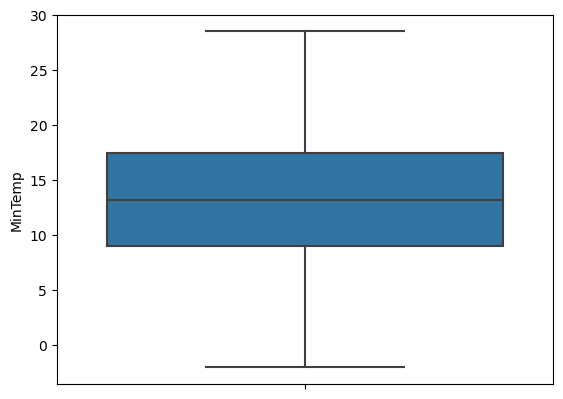

In [25]:
sns.boxplot(y=df['MinTemp'])

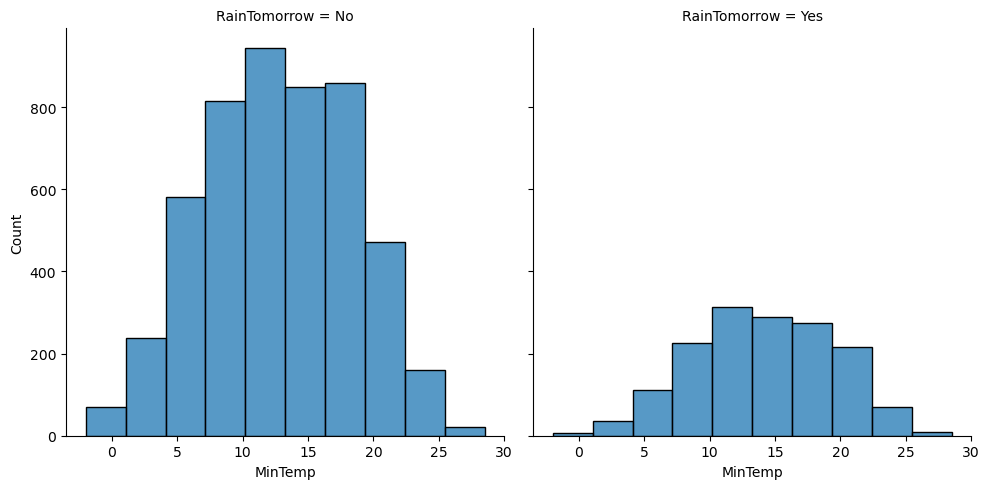

In [26]:
sns.displot(df , x='MinTemp', col ='RainTomorrow',bins=10)

<AxesSubplot:xlabel='RainTomorrow', ylabel='MinTemp'>

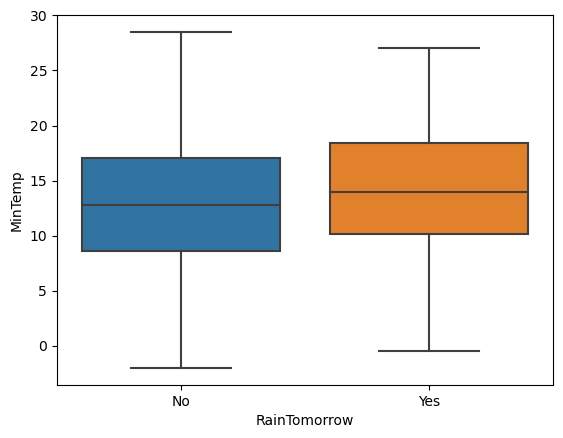

In [27]:
sns.boxplot(x=df['RainTomorrow'],y=df['MinTemp'])
#no outliers 

In [28]:
df.select_dtypes(include='object').describe()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,6762,5820,5968,6468,6624,6624
unique,12,16,16,16,2,2
top,PerthAirport,E,N,SE,No,No
freq,1204,518,609,677,5052,5052


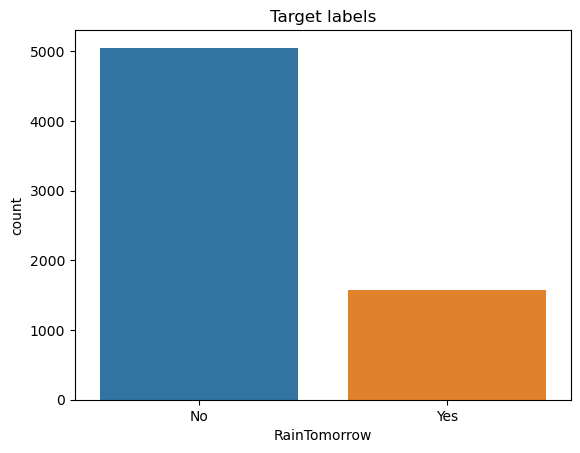

In [29]:
sns.countplot(df.RainTomorrow)
plt.title("Target labels")
plt.show()

In [30]:
df.isnull().sum()

Date                0
Location            0
MinTemp            70
MaxTemp            57
Rainfall          138
Evaporation      2921
Sunshine         3236
WindGustDir       942
WindGustSpeed     942
WindDir9am        794
WindDir3pm        294
WindSpeed9am       63
WindSpeed3pm      100
Humidity9am        54
Humidity3pm        96
Pressure9am      1308
Pressure3pm      1311
Cloud9am         1866
Cloud3pm         1902
Temp9am            51
Temp3pm            92
RainToday         138
RainTomorrow      138
Day                 0
Month               0
Year                0
dtype: int64

In [31]:
#now we will fill ? value with finllna na method 

df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].mode()[0])
df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].mode()[0])
df['Rainfall'] = df['Rainfall'].fillna(df['Rainfall'].mode()[0])
df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].mode()[0])
df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].mode()[0])
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].median())
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindSpeed3pm'] = df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].median())
df['Humidity9am'] = df['Humidity9am'].fillna(df['Humidity9am'].mode()[0])
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].median())
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].median())
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].mode()[0])
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].mode()[0])
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].mode()[0])
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mode()[0])
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow'] = df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])
df['WindSpeed9am'] = df['WindSpeed9am'].fillna(df['WindSpeed9am'].mode()[0])
df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].mode()[0])





In [32]:
df.isnull().sum()
#all null value has been treated

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Day              0
Month            0
Year             0
dtype: int64

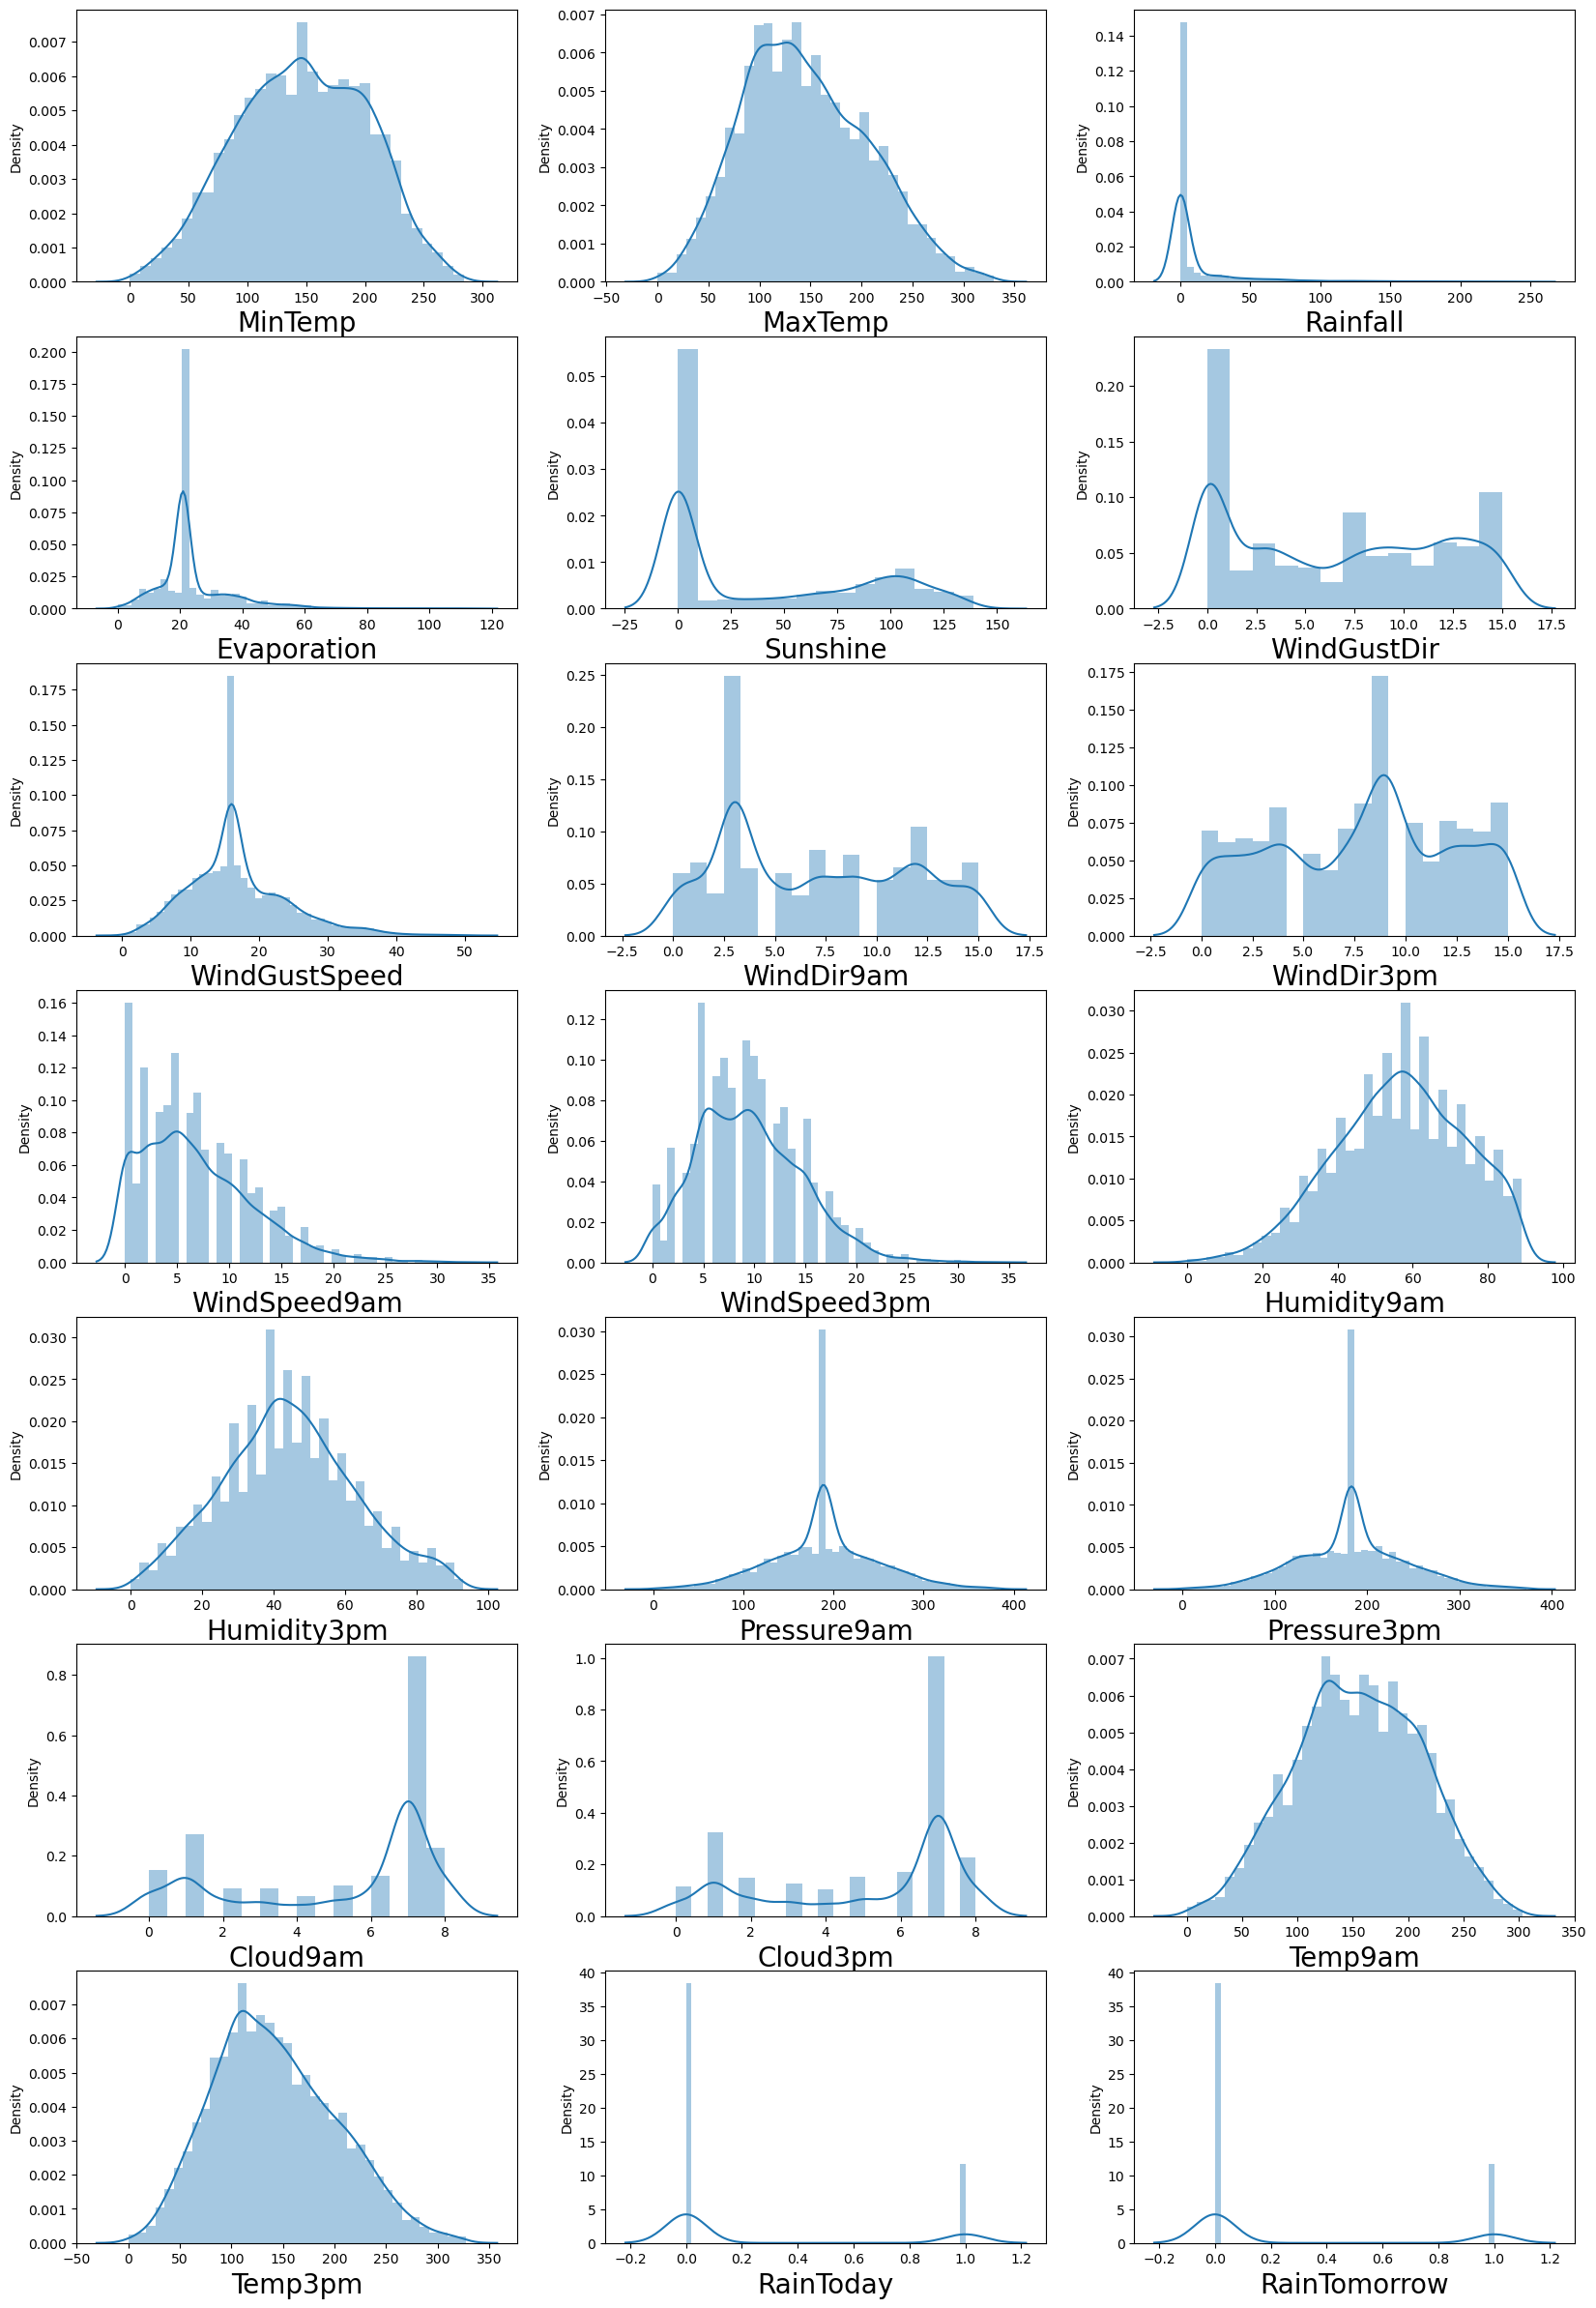

In [44]:
plt.figure(figsize=(20,30),facecolor='white')
plotnum=1
for col in df:
    if plotnum<=21:
        plt.subplot(7,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()
#distplot for analysis

In [45]:
# sorting the data based on data (Time based splitting)
df=df.sort_values(by='Date')

KeyError: 'Date'

In [ ]:

#Removing unwanted features, RISK_MM is same as target label hence removing with data and loaction  
df = df.drop(['Date', 'Location'], axis=1)

In [ ]:
df.shape

<AxesSubplot:>

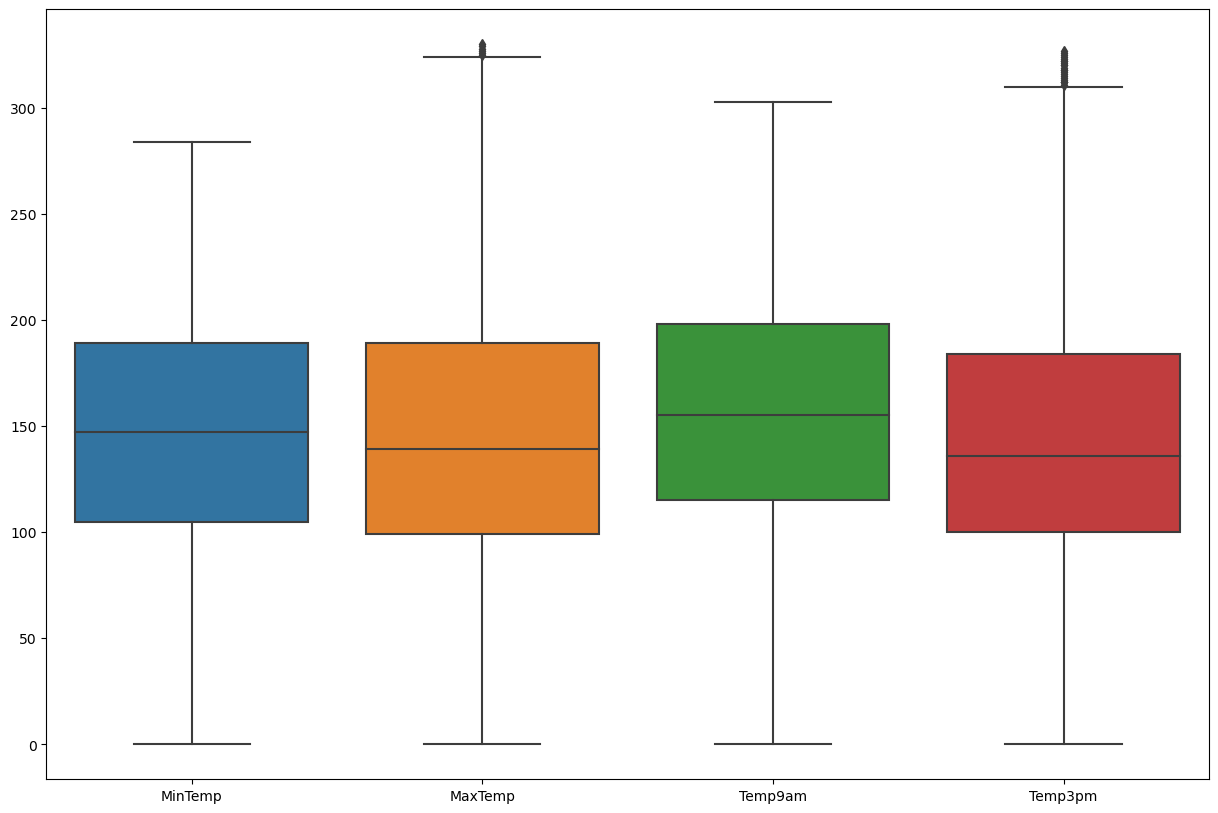

In [46]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df[['MinTemp','MaxTemp','Temp9am','Temp3pm']])
#From the above box plot we can see that all temparature values are meaning full. 
#few outlier is there will treate

<AxesSubplot:>

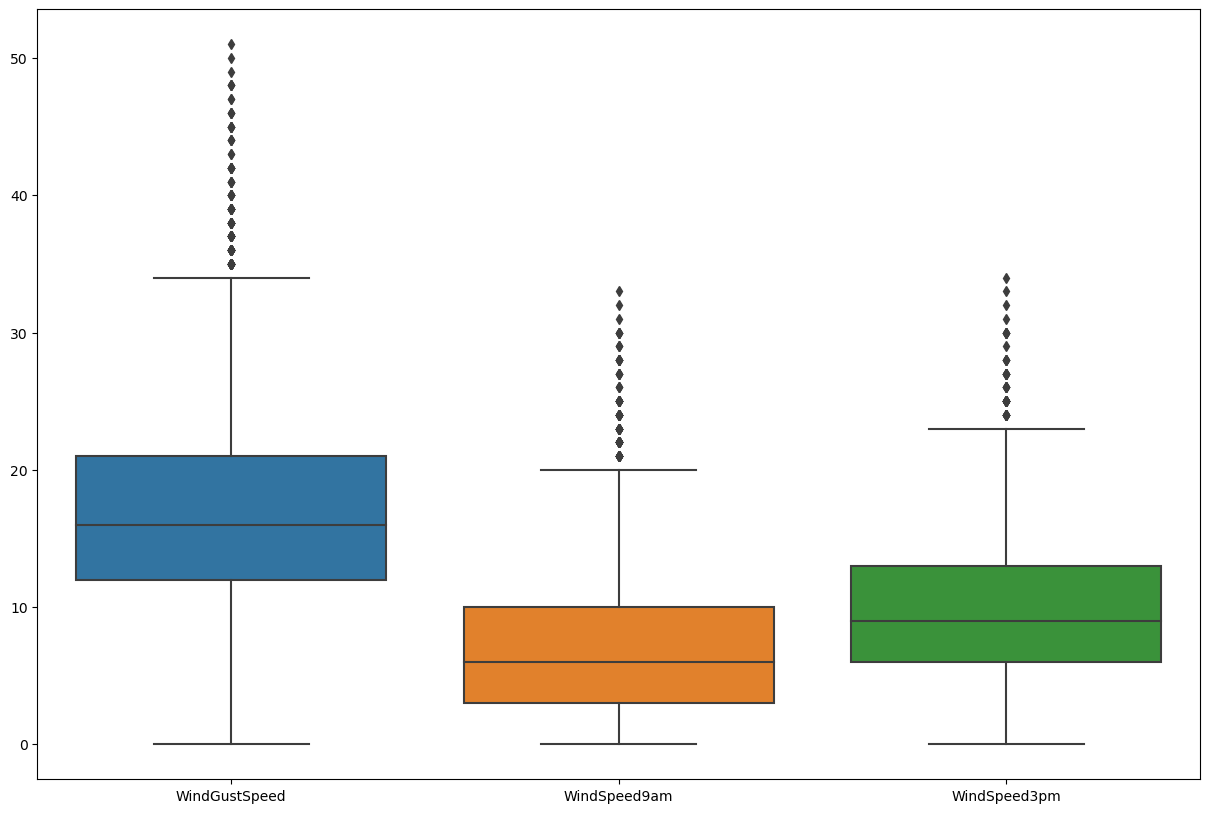

In [47]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df[['WindGustSpeed','WindSpeed9am','WindSpeed3pm']])
#All wind speed values also are in sensible ranges 

<AxesSubplot:>

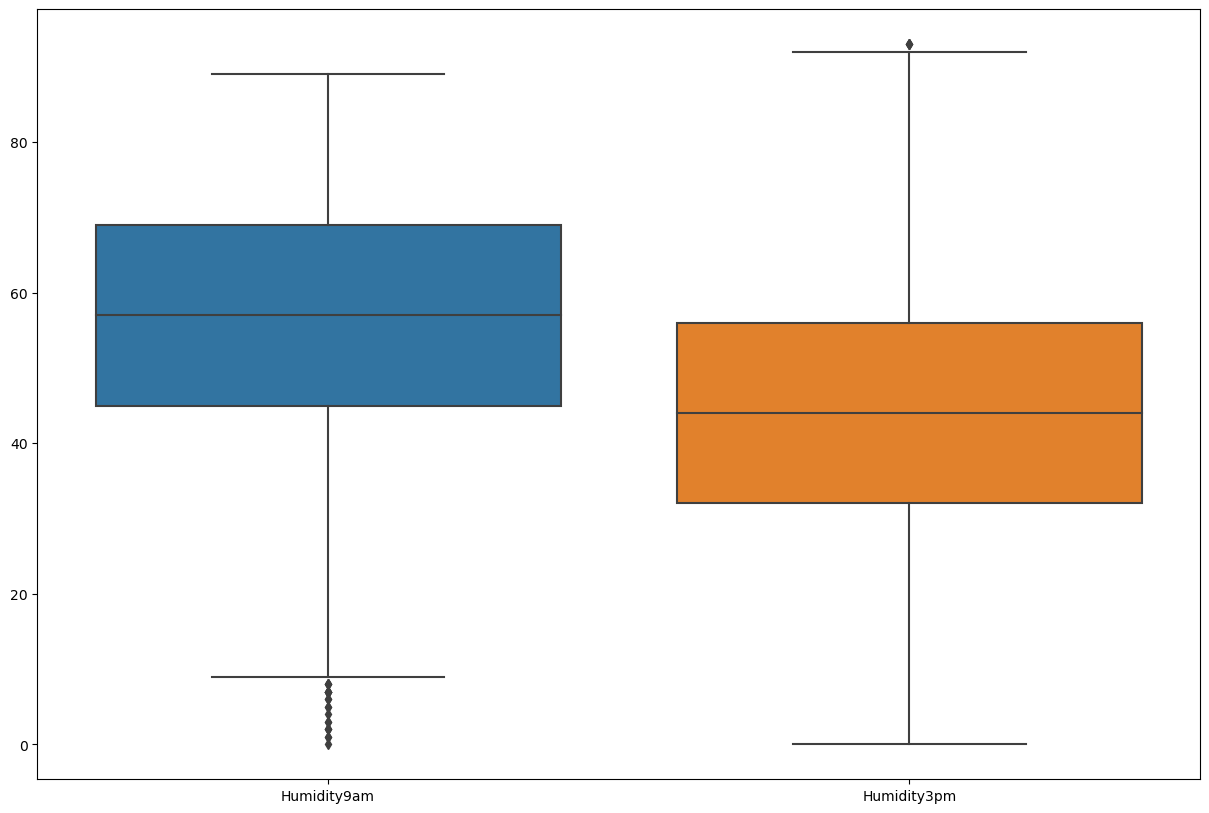

In [48]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df[['Humidity9am','Humidity3pm']])
#As we can see that there are some humidity values =0% which is almost never possible, hence removing 0 values

<AxesSubplot:>

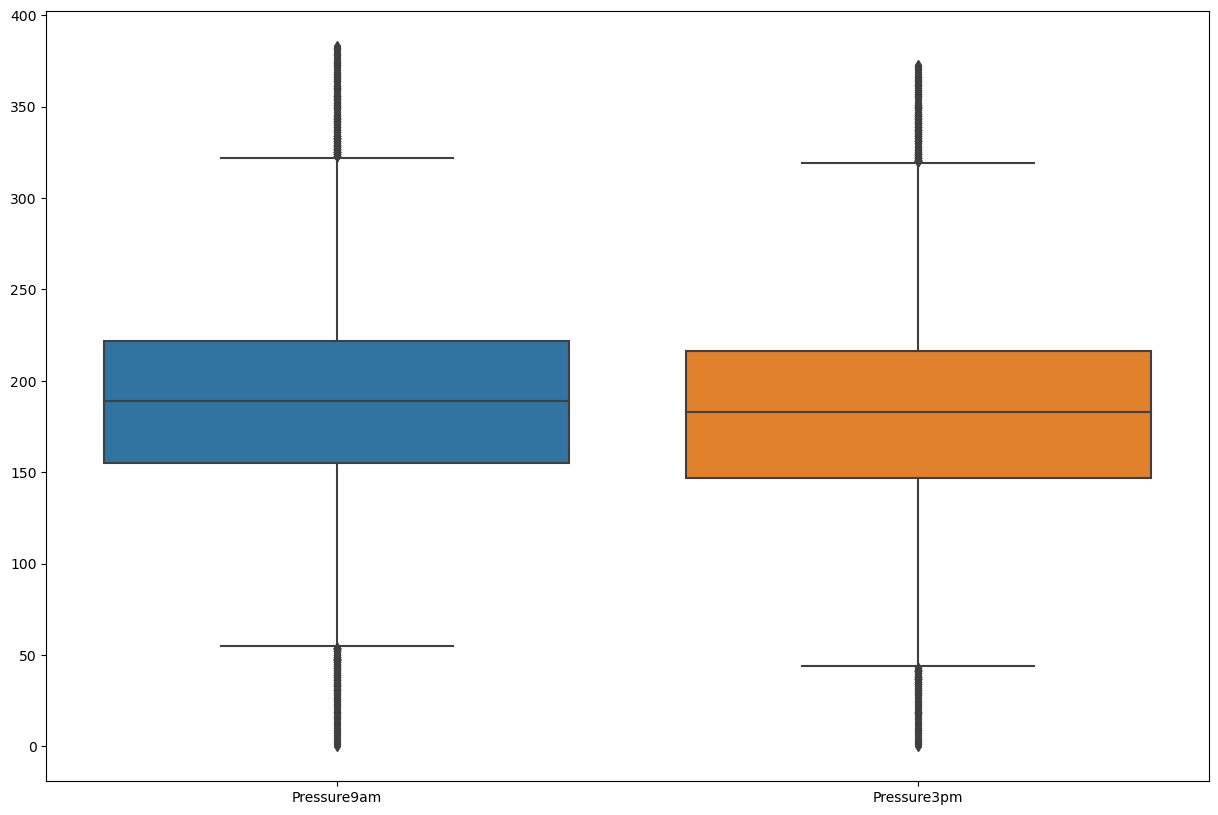

In [49]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df[['Pressure9am','Pressure3pm']])
#Here also there are no outliers, all pressure ranges also normally can happen in nature

<AxesSubplot:>

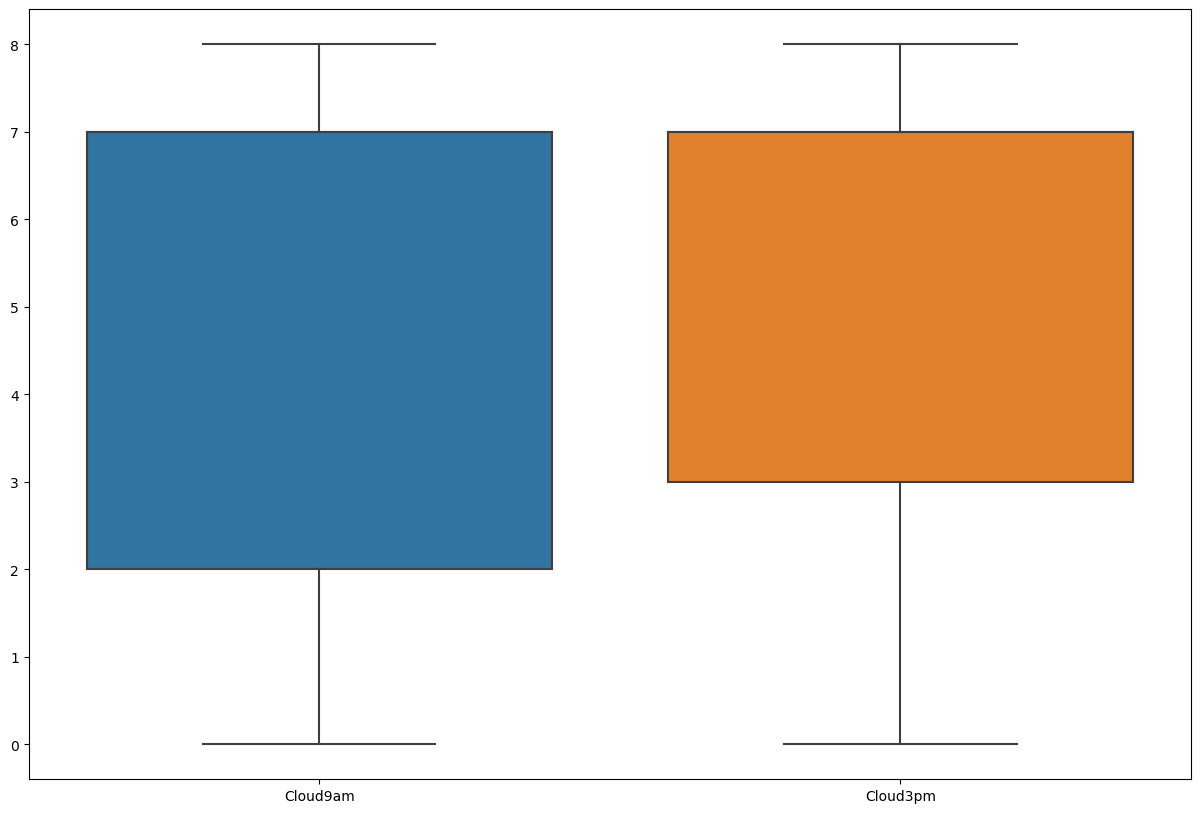

In [50]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df[['Cloud9am','Cloud3pm']])

<AxesSubplot:>

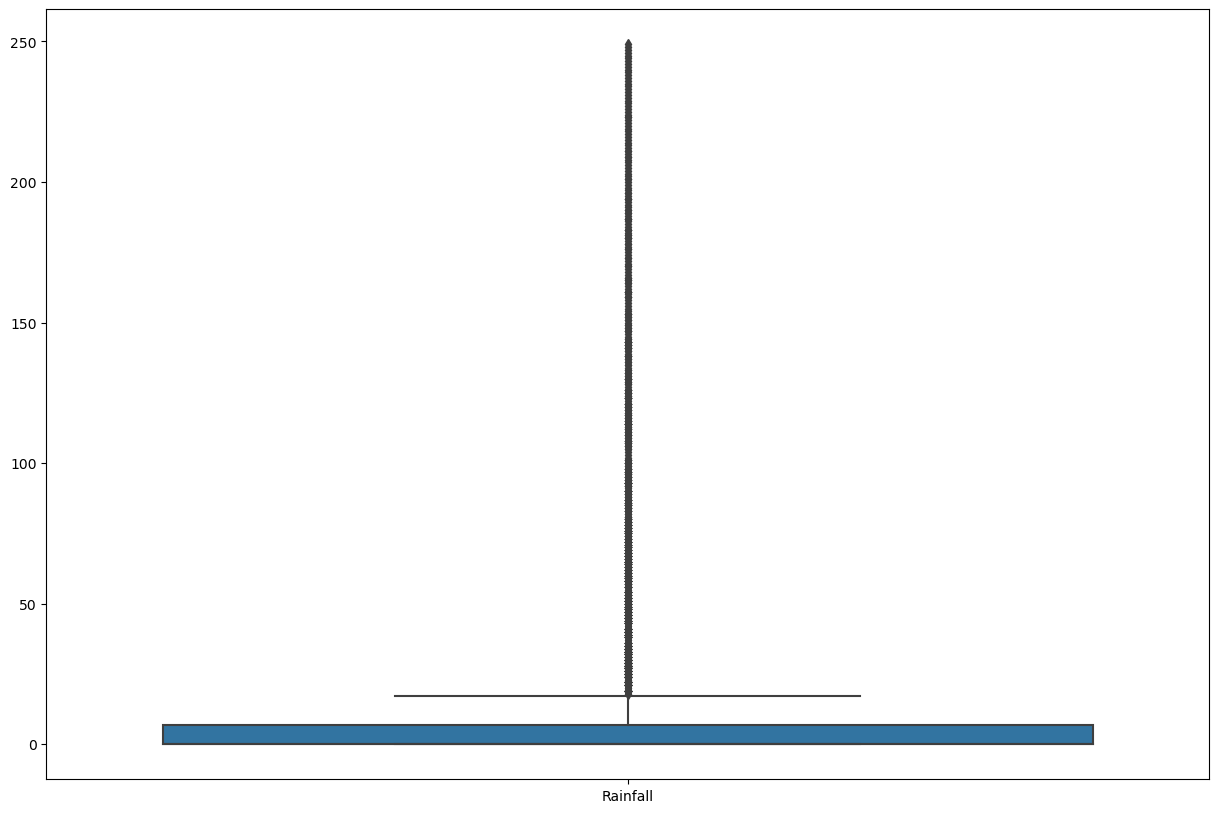

In [51]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df[['Rainfall']])

<AxesSubplot:>

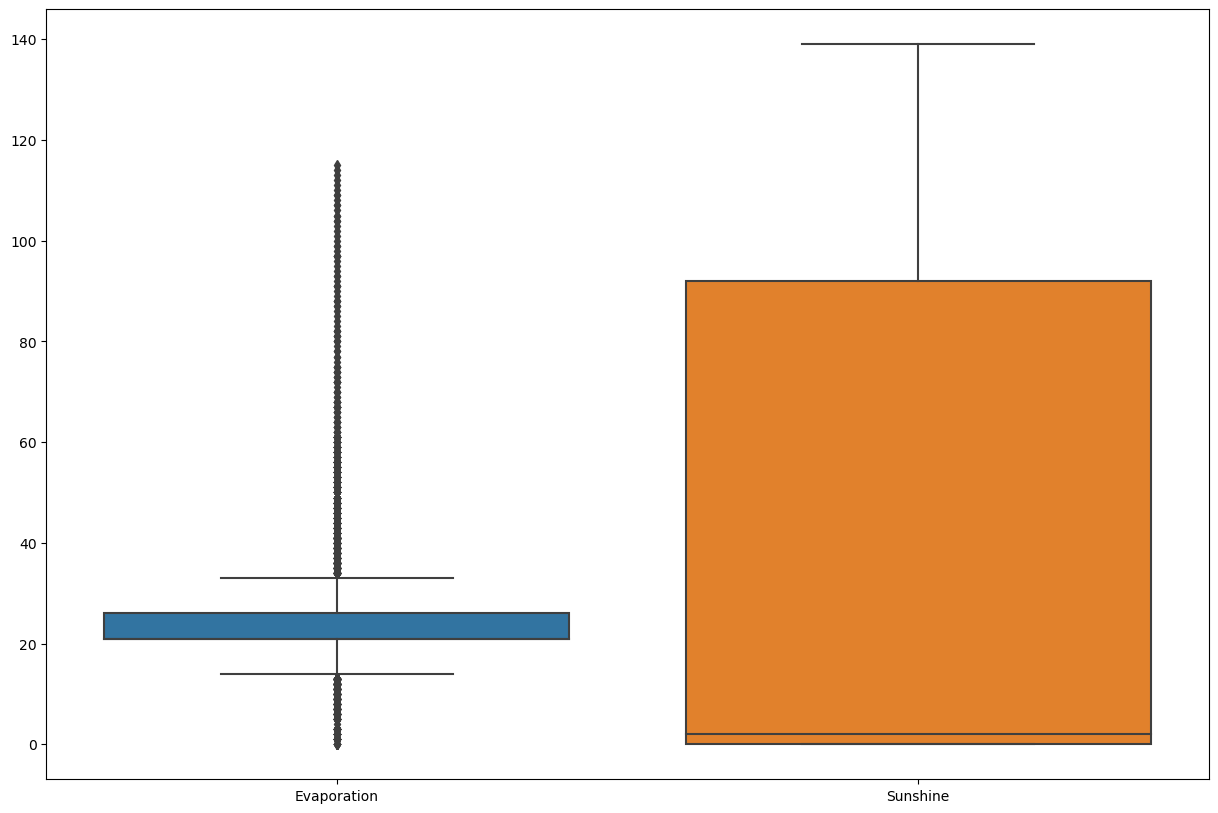

In [52]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df[['Evaporation','Sunshine']])
#Hence the data is not suffering from outliers

In [53]:

# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df:
    df[i] = le.fit_transform(df[i])
df.head()  

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,149,134,5,21,0,13,20,13,14,11,...,103,8,7,145,134,0,0,0,11,0
3437,147,95,0,21,0,0,16,3,9,0,...,65,7,7,124,108,0,0,0,11,0
3438,147,95,0,21,0,0,16,3,9,0,...,100,7,7,124,108,0,0,1,11,0
1,89,156,0,21,0,14,20,6,15,2,...,110,7,7,148,159,0,0,1,11,0
2,144,162,0,21,0,15,21,13,15,10,...,119,7,2,186,148,0,0,2,11,0


In [54]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]
#outlier removing method 

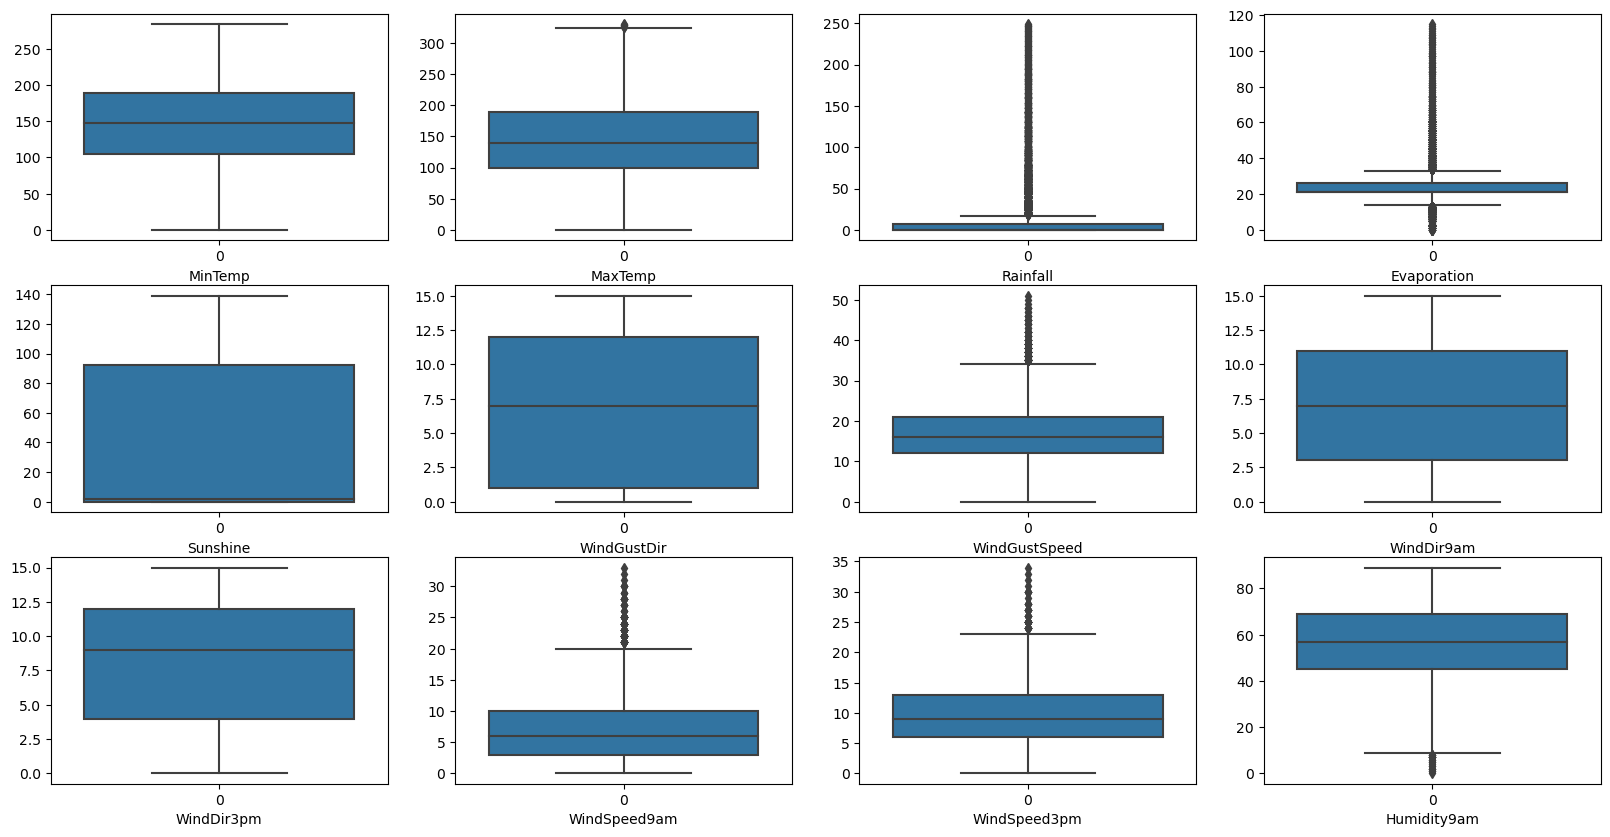

In [55]:
plt.figure(figsize=(20,10))

plotnumber = 1

for c in df1:
    if plotnumber <=12:
        ax = plt.subplot(3,4,plotnumber)
        sns.boxplot(data=df[c])
        plt.xlabel(c)
        
    plotnumber+=1
#outliers has been treated   

In [56]:
df1.skew()
#all the data is in acceptable range 

MinTemp         -0.065827
MaxTemp          0.287614
Rainfall         2.827041
Evaporation      1.180644
Sunshine         0.539879
WindGustDir      0.098545
WindGustSpeed    0.527867
WindDir9am       0.219033
WindDir3pm      -0.123038
WindSpeed9am     0.681124
WindSpeed3pm     0.317462
Humidity9am     -0.220879
Humidity3pm      0.167866
Pressure9am      0.064242
Pressure3pm      0.082651
Cloud9am        -0.696914
Cloud3pm        -0.669476
Temp9am         -0.052630
Temp3pm          0.314682
RainToday        1.416476
RainTomorrow     1.363504
Day              0.001594
Month            0.032256
Year             0.357355
dtype: float64

In [57]:
df1.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
MinTemp,1.000000,0.732081,0.076601,0.405198,0.177430,-0.137633,0.242390,-0.017602,-0.140832,0.169418,...,-0.448151,0.001420,-0.052038,0.892960,0.704805,0.062017,0.085827,0.020556,-0.238378,0.034940
MaxTemp,0.732081,1.000000,-0.173510,0.499515,0.302243,-0.183206,0.170016,-0.179605,-0.158604,0.060428,...,-0.427771,-0.229197,-0.231847,0.864433,0.973596,-0.217242,-0.154438,0.021884,-0.173934,0.081835
Rainfall,0.076601,-0.173510,1.000000,-0.146694,-0.119875,0.086289,0.092304,0.122020,0.081575,0.040569,...,-0.037113,0.179320,0.140269,-0.060501,-0.183105,0.792254,0.293557,-0.002738,-0.010263,-0.010773
Evaporation,0.405198,0.499515,-0.146694,1.000000,0.382598,-0.083932,0.238483,-0.100015,-0.019887,0.245985,...,-0.306038,-0.208462,-0.239610,0.488147,0.486072,-0.183637,-0.110109,0.006656,-0.042310,0.045477
Sunshine,0.177430,0.302243,-0.119875,0.382598,1.000000,0.031343,0.133042,0.029780,-0.060883,0.303401,...,-0.068219,-0.587807,-0.572494,0.329792,0.301773,-0.138171,-0.194062,0.000893,0.012518,-0.254020
WindGustDir,-0.137633,-0.183206,0.086289,-0.083932,0.031343,1.000000,0.030804,0.374833,0.456425,0.106988,...,-0.012159,0.171721,0.122167,-0.145485,-0.193961,0.106752,0.031256,0.013679,0.030451,-0.186338
WindGustSpeed,0.242390,0.170016,0.092304,0.238483,0.133042,0.030804,1.000000,-0.059722,0.090735,0.570379,...,-0.325870,-0.046051,-0.028721,0.223502,0.137786,0.076533,0.165176,-0.004199,0.048033,-0.029187
WindDir9am,-0.017602,-0.179605,0.122020,-0.100015,0.029780,0.374833,-0.059722,1.000000,0.204995,0.099948,...,0.058450,0.054366,0.038742,-0.055031,-0.187939,0.142001,0.028911,-0.007608,0.020275,-0.085984
WindDir3pm,-0.140832,-0.158604,0.081575,-0.019887,-0.060883,0.456425,0.090735,0.204995,1.000000,0.030956,...,-0.043226,0.078179,0.055594,-0.145268,-0.171486,0.092563,-0.002213,0.000309,0.025322,0.002305
WindSpeed9am,0.169418,0.060428,0.040569,0.245985,0.303401,0.106988,0.570379,0.099948,0.030956,1.000000,...,-0.110525,-0.095844,-0.077612,0.156055,0.049682,0.037688,0.043209,-0.013928,0.031273,-0.119091


<AxesSubplot:>

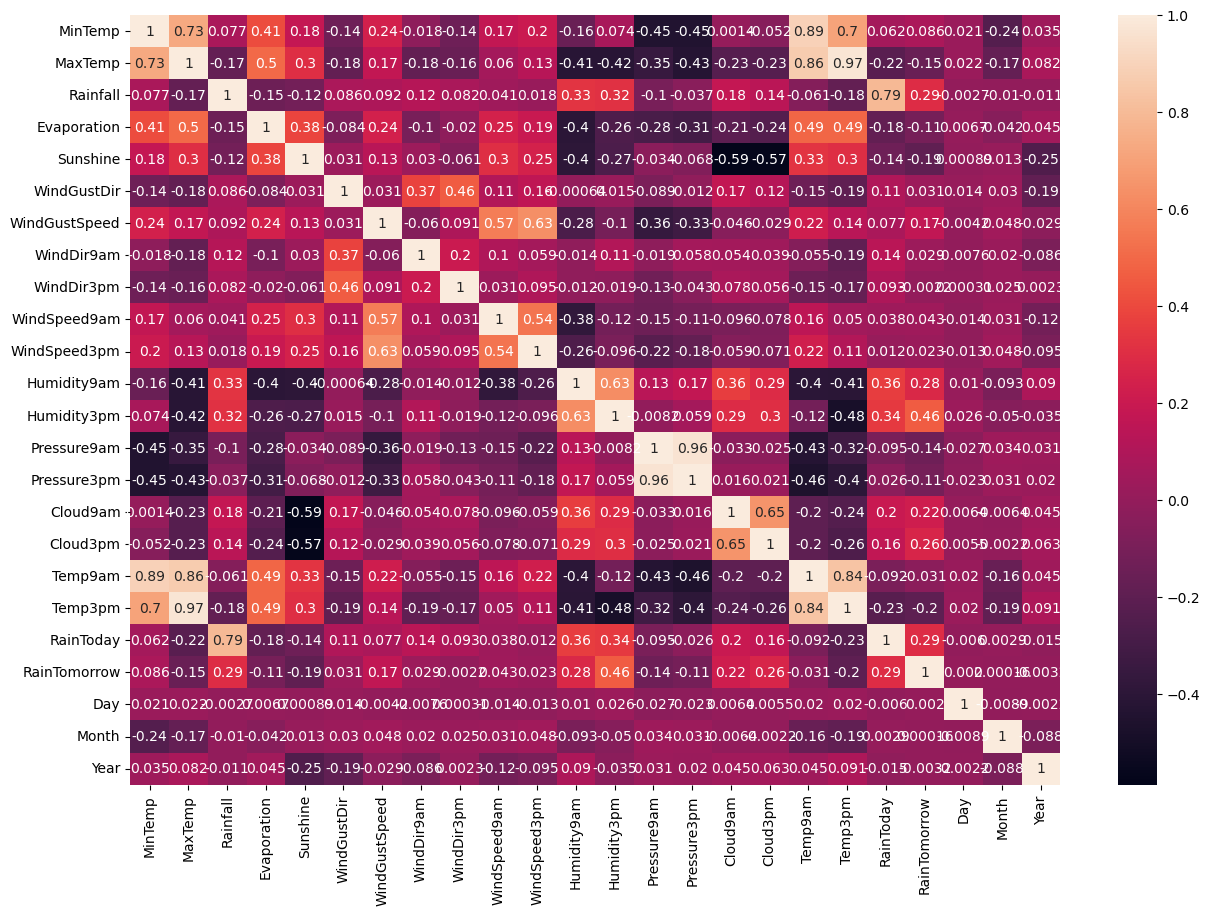

In [58]:
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),annot=True)

In [59]:
df1.RainTomorrow.value_counts()
#data is imbalance so will balance the data 

0    4903
1    1370
Name: RainTomorrow, dtype: int64

In [60]:
from imblearn.over_sampling import SMOTE
x = df1.drop('RainTomorrow',axis=1)
y = df1['RainTomorrow']

In [61]:
oversample=SMOTE()
x, y = oversample.fit_resample(x,y)

In [62]:
y.value_counts()

0    4903
1    4903
Name: RainTomorrow, dtype: int64

In [63]:
##We have successfully resolved the class imbalanced problem and now all the categories have same data ensuring that the ML model does not get biased towards one category.

In [64]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge,LassoCV , RidgeCV,Lasso 

from xgboost import XGBRegressor    
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score , confusion_matrix,roc_curve,roc_auc_score
#all the necassary liabraries that required for building a model

In [65]:
#train test split , splitting the data 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

In [66]:
# defined a funcution 
def metric_score(clf,x_train,x_test,y_train,y_test,train = True):
    if train:
        y_pred = clf.predict(x_train)
        
        
        print('============trainresult===============')
        
        print(f'accuracy_score{accuracy_score(y_train,y_pred) *  100:.2f}%' )
        
    elif train == False:
        
        pred = clf.predict(x_test)
        
        print('============testresult===============')
        
        print(f'accuracy_score {accuracy_score(y_test,pred)* 100:.2f}%')
        
        print(classification_report(y_test,pred,digits = 2))

In [67]:
#creating an object of logistic regression model
log = LogisticRegression()

log.fit(x_train,y_train)
y_pred = log.predict_proba(x_test)
y_pred

array([[0.7591092 , 0.2408908 ],
       [0.46278072, 0.53721928],
       [0.2906083 , 0.7093917 ],
       ...,
       [0.02769118, 0.97230882],
       [0.55421142, 0.44578858],
       [0.73765061, 0.26234939]])

In [68]:
metric_score(log,x_train,x_test,y_train,y_test,train = True)
metric_score(log,x_train,x_test,y_train,y_test,train = False)

============trainresult===============
accuracy_score77.17%
============testresult===============
accuracy_score 75.79%
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       951
           1       0.78      0.74      0.76      1011

    accuracy                           0.76      1962
   macro avg       0.76      0.76      0.76      1962
weighted avg       0.76      0.76      0.76      1962



In [69]:
cv_score = (cross_val_score(log, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check 

Cross Validation Score: 70.7324894567408


In [70]:
#DecisionTreeClassifier model
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred = clf.predict_proba(x_test)
y_pred

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [71]:
metric_score(clf,x_train,x_test,y_train,y_test,train = True)
metric_score(clf,x_train,x_test,y_train,y_test,train = False)

============trainresult===============
accuracy_score100.00%
============testresult===============
accuracy_score 80.68%
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       951
           1       0.81      0.82      0.81      1011

    accuracy                           0.81      1962
   macro avg       0.81      0.81      0.81      1962
weighted avg       0.81      0.81      0.81      1962



In [72]:
cv_score = (cross_val_score(clf, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check 

Cross Validation Score: 67.51043929510261


In [73]:
#hyper parameter tunning 
grid_params = {'criterion':['gini','entropy'],
              'max_depth':range(12,15),
              'min_samples_leaf':range(4,6),
              'min_samples_split':range(3,5),
              'max_leaf_nodes':range(5,10)}

grid = GridSearchCV(estimator=clf,
                   param_grid = grid_params,
                   cv = 5)


In [74]:
#time to train the data for best paraam and get best out of it
grid.fit(x_train,y_train)
best = grid.best_params_
best

{'criterion': 'entropy',
 'max_depth': 12,
 'max_leaf_nodes': 9,
 'min_samples_leaf': 4,
 'min_samples_split': 3}

In [82]:
d_t = DecisionTreeClassifier(criterion= 'entropy', max_depth= 12,max_leaf_nodes=9,min_samples_leaf= 4,min_samples_split=3)
d_t.fit(x_train,y_train)
#best params and traning data

DecisionTreeClassifier(criterion='entropy', max_depth=12, max_leaf_nodes=9,
                       min_samples_leaf=4, min_samples_split=3)

In [83]:
metric_score(d_t,x_train,x_test,y_train,y_test,train = True)
metric_score(d_t,x_train,x_test,y_train,y_test,train = False)
#afterbest params result got better DecisionTreeClassifier

============trainresult===============
accuracy_score75.98%
============testresult===============
accuracy_score 75.48%
              precision    recall  f1-score   support

           0       0.76      0.73      0.74       951
           1       0.75      0.78      0.77      1011

    accuracy                           0.75      1962
   macro avg       0.76      0.75      0.75      1962
weighted avg       0.75      0.75      0.75      1962



In [84]:
#RandomForestClassifier model
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predict = RFC.predict(x_test)
predict

#Created the Random Forest Classifier Model and checked for it's evaluation metrics.

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [85]:
metric_score(RFC,x_train,x_test,y_train,y_test,train = True)
metric_score(RFC,x_train,x_test,y_train,y_test,train = False)

============trainresult===============
accuracy_score100.00%
============testresult===============
accuracy_score 90.16%
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       951
           1       0.89      0.92      0.91      1011

    accuracy                           0.90      1962
   macro avg       0.90      0.90      0.90      1962
weighted avg       0.90      0.90      0.90      1962



In [86]:
cv_score = (cross_val_score(RFC, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check  

Cross Validation Score: 71.87613613267067


In [87]:
#hyper parameter tunning 
grid_params = {'criterion':['gini','entropy'],
              'max_depth':range(12,15),
              'min_samples_leaf':range(4,6),
              'min_samples_split':range(3,5),
              'max_leaf_nodes':range(5,10)}

grid = GridSearchCV(estimator=clf,
                   param_grid = grid_params,
                   cv = 5)

In [88]:
    #time to train the data for best paraam and get best out of it
    grid.fit(x_train,y_train)
    best = grid.best_params_
    best

{'criterion': 'entropy',
 'max_depth': 12,
 'max_leaf_nodes': 9,
 'min_samples_leaf': 4,
 'min_samples_split': 3}

In [89]:
RF = RandomForestClassifier(criterion= 'entropy', max_depth= 12,max_leaf_nodes=9 ,min_samples_leaf= 4,min_samples_split=3)
RF.fit(x_train,y_train)
#best params and traning data

RandomForestClassifier(criterion='entropy', max_depth=12, max_leaf_nodes=9,
                       min_samples_leaf=4, min_samples_split=3)

In [90]:
metric_score(RF,x_train,x_test,y_train,y_test,train = True)
metric_score(RF,x_train,x_test,y_train,y_test,train = False)
#afterbest params result got better RandomForestClassifier

============trainresult===============
accuracy_score77.94%
============testresult===============
accuracy_score 76.20%
              precision    recall  f1-score   support

           0       0.75      0.76      0.75       951
           1       0.77      0.77      0.77      1011

    accuracy                           0.76      1962
   macro avg       0.76      0.76      0.76      1962
weighted avg       0.76      0.76      0.76      1962



In [91]:
# KNeighborsClassifier model
KNC = KNeighborsClassifier(n_neighbors=13)
KNC.fit(x_train,y_train)
y_pred = log.predict_proba(x_test)
y_pred
#Created the K Neighbors Classifier Model and checked for it's evaluation metrics.
# tried with many numbers n_neighbors but getting best accurancy with hence done ith that

array([[0.7591092 , 0.2408908 ],
       [0.46278072, 0.53721928],
       [0.2906083 , 0.7093917 ],
       ...,
       [0.02769118, 0.97230882],
       [0.55421142, 0.44578858],
       [0.73765061, 0.26234939]])

In [92]:
metric_score(KNC,x_train,x_test,y_train,y_test,train = True)
metric_score(KNC,x_train,x_test,y_train,y_test,train = False)

============trainresult===============
accuracy_score83.41%
============testresult===============
accuracy_score 81.04%
              precision    recall  f1-score   support

           0       0.86      0.72      0.79       951
           1       0.77      0.89      0.83      1011

    accuracy                           0.81      1962
   macro avg       0.82      0.81      0.81      1962
weighted avg       0.82      0.81      0.81      1962



In [93]:
cv_score = (cross_val_score(KNC, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check  

Cross Validation Score: 75.06637327997898


In [94]:
#hyper parameter traning
param = {'algorithm': ['kd_tree','brute'],
        'leaf_size':[3,4,5,6,7,9],
        'n_neighbors' : [2,3,4,5,6,7]
        }
grid = GridSearchCV(estimator = KNC,param_grid=param)
grid.fit(x_train,y_train)
grid.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 2}

In [95]:
#best tuning
knn = KNeighborsClassifier(algorithm = 'kd_tree', leaf_size=3, n_neighbors= 2)

knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=2)

In [96]:
metric_score(knn,x_train,x_test,y_train,y_test,train=False)

metric_score(knn,x_train,x_test,y_train,y_test,train=True)

============testresult===============
accuracy_score 88.53%
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       951
           1       0.87      0.92      0.89      1011

    accuracy                           0.89      1962
   macro avg       0.89      0.88      0.88      1962
weighted avg       0.89      0.89      0.89      1962

============trainresult===============
accuracy_score98.90%


In [97]:
# GradientBoostingClassifier model
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(x_train,y_train)
y_pred = GBC.predict_proba(x_test)
y_pred

array([[0.7440664 , 0.2559336 ],
       [0.45518494, 0.54481506],
       [0.07757237, 0.92242763],
       ...,
       [0.05191488, 0.94808512],
       [0.76634806, 0.23365194],
       [0.75366438, 0.24633562]])

In [98]:
metric_score(GBC,x_train,x_test,y_train,y_test,train = True)
metric_score(GBC,x_train,x_test,y_train,y_test,train = False)
##Created the GradientBoostingClassifir

============trainresult===============
accuracy_score85.12%
============testresult===============
accuracy_score 82.31%
              precision    recall  f1-score   support

           0       0.82      0.81      0.82       951
           1       0.83      0.83      0.83      1011

    accuracy                           0.82      1962
   macro avg       0.82      0.82      0.82      1962
weighted avg       0.82      0.82      0.82      1962



In [99]:
from sklearn.svm import SVC
# Support Vector Machines
svmMod = SVC()
svmMod.fit(x_train,y_train)
y_pred = svmMod.predict(x_test)
y_pred

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [100]:
metric_score(svmMod,x_train,x_test,y_train,y_test,train = True)
metric_score(svmMod,x_train,x_test,y_train,y_test,train = False)
#SVC with function 

============trainresult===============
accuracy_score78.24%
============testresult===============
accuracy_score 76.91%
              precision    recall  f1-score   support

           0       0.75      0.78      0.77       951
           1       0.79      0.76      0.77      1011

    accuracy                           0.77      1962
   macro avg       0.77      0.77      0.77      1962
weighted avg       0.77      0.77      0.77      1962



In [101]:
# BaggingClassifier model
from sklearn.ensemble import BaggingClassifier
BC = BaggingClassifier()
BC.fit(x_train,y_train)
y_pred = BC.predict_proba(x_test)
y_pred

array([[0.9, 0.1],
       [0.2, 0.8],
       [0.1, 0.9],
       ...,
       [0. , 1. ],
       [0.5, 0.5],
       [0.5, 0.5]])

In [102]:
metric_score(BC,x_train,x_test,y_train,y_test,train = True)
metric_score(BC,x_train,x_test,y_train,y_test,train = False)
##Created the BaggingClassifier

============trainresult===============
accuracy_score99.45%
============testresult===============
accuracy_score 86.60%
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       951
           1       0.88      0.86      0.87      1011

    accuracy                           0.87      1962
   macro avg       0.87      0.87      0.87      1962
weighted avg       0.87      0.87      0.87      1962



In [103]:
cv_score = (cross_val_score(BC, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check  

Cross Validation Score: 69.24480478401198


In [ ]:
#final module is DTC as giving best result after hyperparameter tuning 